In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.stats import kde
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display
from datetime import datetime
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



truckTwoPath = "../data/trucks/truck2.csv"

truckTwoDictPath = "../data/dictionary/truck2_data_dictionary.csv"

In [2]:
def get_truck_data():
    trucks2 = pd.read_csv(os.path.join('../data/trucks/truck2.csv'),
               sep=',',engine='python')
    
    return trucks2

In [3]:
trucks2 = get_truck_data()



In [4]:
def readCsv(truck):
    return pd.read_csv(truck, header = [0])
    
def cullUtcCols(truckData):
    noUTC = truckData.drop(["UTC hour", "UTC minute", "UTC second", "UTC month", "UTC day", "UTC year"], axis = 1)
    return noUTC

"""Takes a DataFrame and a conversion dictionary as parameters;
    uses the dictionary to rename all matching columns then returns the changed DataFrame."""
def renameColumns(dataFrame, dictionary):
    return dataFrame.rename(columns = dictionary)

"""Finds threshold of Non-NA type using percentage and deletes rows."""

#If the number of values that are NOT Na type pass this percentage, the row will be deleted
rowNaNThresholdPercent = 75
def removeUnnecessaryRows(dataFrame):
    length = len(dataFrame.columns)
    TValue = (rowNaNThresholdPercent / 100) * length
    print("Threshold value: " + str(int(TValue)))
    return dataFrame.dropna(thresh = int(TValue))

"""Finds columns with all Na types and deletes them."""
def removeUnnecessaryColumns(dataFrame):
    return dataFrame.dropna(axis=1, how='all')

# NOTE: The following function is unused in this notebook, but it can be used to convert CSV files into
# conversion dictionaries i.e. creating the column rename dictionaries, which was manually done in the
# previous block manually.

"""Creates a Python dictionary from a pre-defined CSV dictionary.
This will only look at the first two columns of the given CSV file."""
def createPythonDictionary(dictionaryCSV):
    # Initialize the resulting dictionary.
    dictResult = {}
    
    # Opens the passed in CSV which defines the rename dictionary and iterates through it to store each value into a Python dictionary.
    with open(dictionaryCSV, 'r') as f:
        for row in csv.reader(f):
            dictResult.update({row[0]:row[1]})
    return dictResult



In [5]:
##### Remove columns we're not interested in
truck2_temp_only = trucks2.drop(['Time', 'C_1115_1_Alternator_250A', 'C_1115_2_BattOut_100A', 'C_1115_3_Fridge_20A' ,'EngineAirIntakeTemp_BB1_X_E', 'C_1115_4_Trailer_50A', 'C_1115_5_Inventer_100A','asu_UreaTankTemp', 'EngExhaustGasTemp','tse_TurboSpeed', 'TotalVehicleDistanceHighRes', 'EngineSpeed', 'WheelBasedVehicleSpeed', 'EngineKeyPosition', 'SteeringWheelAngle1', 'BarometricPressure_BB1_X_E', 'CPU load', 'UTC hour', 'UTC minute', 'UTC second', 'UTC month', 'UTC day', 'UTC year', 'GPS altitude', 'GPS speed', 'BoostPressure', 'VehicleSpeed', 'CruiseCtrlSetSpeed','VehicleWeightVP15', 'RoadInclinationVP15', 'TransOilPress', 'TransOilLevel', 'ActualEnginePercentTorque', 'ActualEnginePercentTorqueHiRes', 'DrvrDemandEngPercentTorque', 'EngDemandPercentTorque', 'EnginePercentLoadAtCurrentSpd', 'EngineOilLevel', 'EngineOilPressure', 'EngDslPrtclateFilterIntakePress', 'EngIntakeManifold1Press'], axis=1)

In [7]:
truck2_temp_only = removeUnnecessaryColumns(truck2_temp_only)

In [8]:
truck2_temp_only = removeUnnecessaryRows(truck2_temp_only)

Threshold value: 3


In [30]:
truck_fill = truck2_temp_only[['EngineCoolantTemp_stat', 'EngineOilTemperature', 'EngIntakeManifold1Temp', 'TransmissionOilTemp', 'AmbientAirTemperature_V']].ffill().bfill()


In [42]:
truck2_temp_only = truck_fill

In [43]:
X = truck2_temp_only[['EngineCoolantTemp_stat', 'EngineOilTemperature', 'TransmissionOilTemp', 'AmbientAirTemperature_V']].values
y = truck2_temp_only['EngIntakeManifold1Temp'].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [49]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred = regressor.predict(X_test)

In [56]:
y_pred

array([26.45723444, 25.40167567, 34.77650902, ..., 25.6452871 ,
       23.33666751, 31.26604536])

In [57]:
y_test

array([31., 24., 41., ..., 25., 22., 30.])

Text(0, 0.5, 'Predictions')

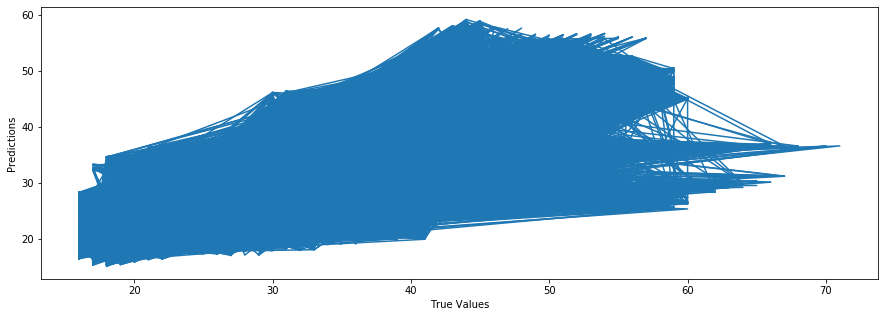

In [92]:
plt.figure(figsize=(15,5))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel('Predictions')

Text(0, 0.5, 'Predictions')

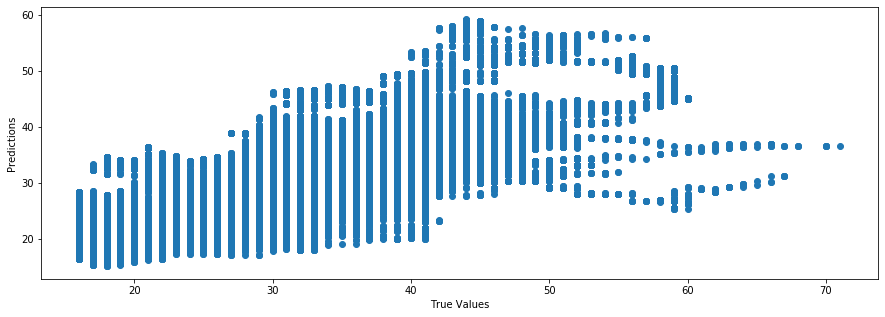

In [69]:
plt.figure(figsize=(15,5))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel('Predictions')

In [63]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [64]:
predictions

array([26.45723444, 25.40167567, 34.77650902, ..., 25.6452871 ,
       23.33666751, 31.26604536])

In [70]:
model.score(X_test,y_test)

0.7341028591090475

In [80]:
X = np.append(arr = np.ones((1686308, 1)).astype(int), values = X, axis=1)

In [81]:
X

array([[  1.     ,  79.     , 118.875  ,  85.     ,  16.9375 ],
       [  1.     ,  79.     , 118.875  ,  85.     ,  16.9375 ],
       [  1.     ,  79.     , 118.875  ,  85.     ,  16.9375 ],
       ...,
       [  1.     ,  78.     , 116.375  ,  82.59375,  13.34375],
       [  1.     ,  78.     , 116.375  ,  82.59375,  13.34375],
       [  1.     ,  78.     , 116.375  ,  82.59375,  13.34375]])

In [86]:
#### Only using variables that are significantly significant with backward elimination
X_opt = X[:, [0, 1, 2, 3, 4]]

In [87]:
X_opt

array([[  1.     ,  79.     , 118.875  ,  85.     ,  16.9375 ],
       [  1.     ,  79.     , 118.875  ,  85.     ,  16.9375 ],
       [  1.     ,  79.     , 118.875  ,  85.     ,  16.9375 ],
       ...,
       [  1.     ,  78.     , 116.375  ,  82.59375,  13.34375],
       [  1.     ,  78.     , 116.375  ,  82.59375,  13.34375],
       [  1.     ,  78.     , 116.375  ,  82.59375,  13.34375]])

In [88]:
##### Creating a new regressor from statsmodels
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [89]:
regressor_OLS

In [91]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                 1.167e+06
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:02:06   Log-Likelihood:            -4.8943e+06
No. Observations:             1686308   AIC:                         9.789e+06
Df Residuals:                 1686303   BIC:                         9.789e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8231      0.132   -256.293      0.000     -34.082     -33.564
x1             1.1370      0.002    582.600      0.000       1.133       1.141
x2            -0.6087      0.001  -1001.456      0.000      -0.610      -0.607
x3             0.3967      0.001    272.600      0.000       0.394       0.400
x4             0.8608      0.001   1139.289      0.000       0.859       0.862
==============================================================================
Omnibus:                   347849.307   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1102257.968
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                       6.351   Cond. No.                     6.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
truck2_temp_only


,EngineCoolantTemp_stat,EngineOilTemperature,EngIntakeManifold1Temp,TransmissionOilTemp,AmbientAirTemperature_V
0,79.0,118.87500,33.0,85.00000,16.93750
1,79.0,118.87500,33.0,85.00000,16.93750
2,79.0,118.87500,33.0,85.00000,16.93750
3,79.0,118.87500,33.0,85.00000,16.93750
4,79.0,118.87500,33.0,85.00000,16.93750
5,79.0,118.87500,33.0,85.00000,16.93750
6,79.0,118.68750,33.0,85.00000,16.93750
7,79.0,118.68750,33.0,85.00000,16.93750
8,79.0,118.68750,33.0,85.00000,16.93750
9,79.0,118.68750,33.0,85.06250,16.93750
